Overview of Project Tasks
Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

- ***Task 1***: Familiarize yourself with the dataset 

- ***Task 2***: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

- ***Task 3***: Load the dataset in a Jupyter Notebook using Watson Studio.

- ***Task 4***: Generate basic statistics and visualizations for upper management. 

- ***Task 5***: Use the appropriate tests to answer the questions provided.

- ***Task 6*** Share your Jupyter Notebook.

# Task 1: Become familiar with the dataset
The following describes the dataset variables:

* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS - proportion of non-retail business acres per town.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*  NOX - nitric oxides concentration (parts per 10 million)

* RM - average number of rooms per dwelling

* AGE - proportion of owner-occupied units built prior to 1940

* DIS - weighted distances to five Boston employment centres

* RAD - index of accessibility to radial highways

* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town

* LSTAT - % lower status of the population

* MEDV - Median value of owner-occupied homes in $1000's

# Task 2 : (optional)

# Task 3: Load in the Dataset in your Jupyter Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

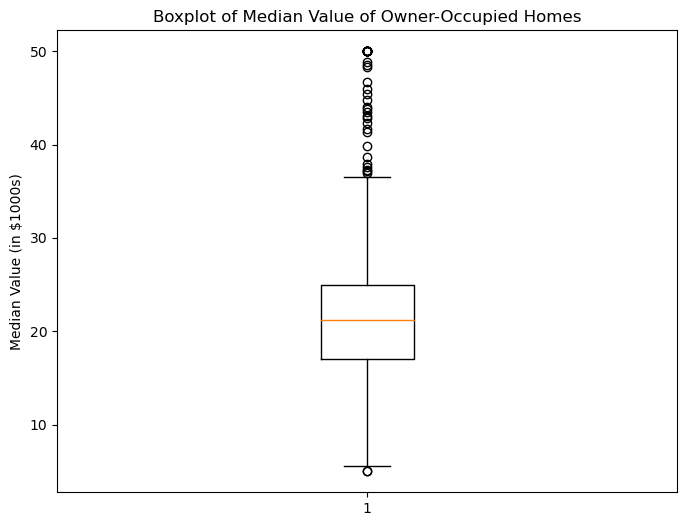

In [3]:
# For the "Median value of owner-occupied homes" provide a boxplot

plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

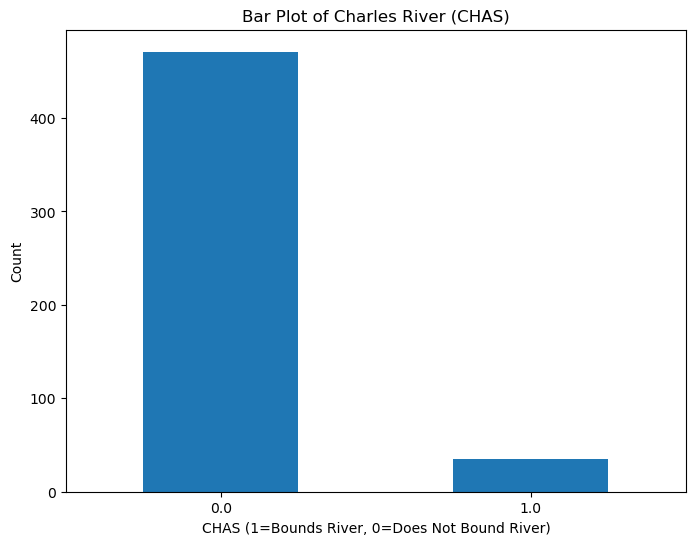

In [4]:
# Provide a  bar plot for the Charles river variable

plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Charles River (CHAS)')
plt.xlabel('CHAS (1=Bounds River, 0=Does Not Bound River)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

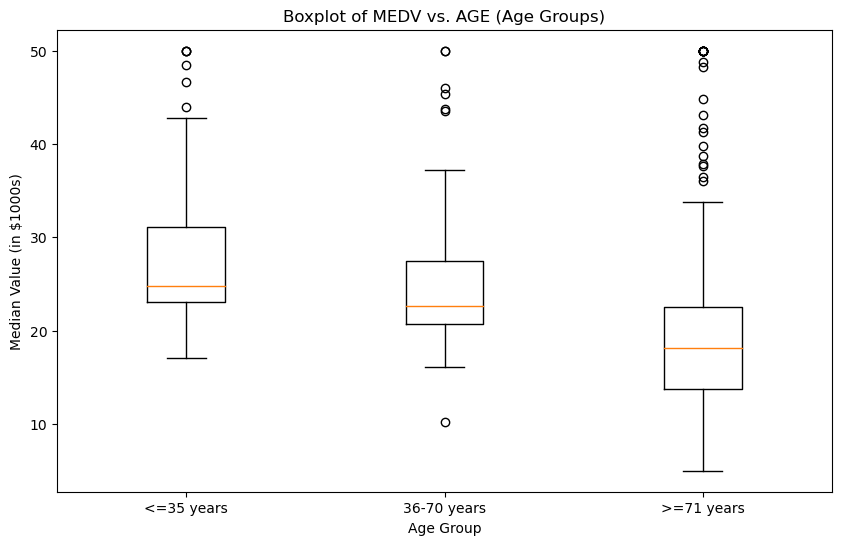

In [5]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Discretize the AGE variable into three groups
bins = [0, 35, 70, max(boston_df['AGE'])]
labels = ['<=35 years', '36-70 years', '>=71 years']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
plt.boxplot([boston_df[boston_df['AGE_Group'] == group]['MEDV'] for group in labels], labels=labels)
plt.title('Boxplot of MEDV vs. AGE (Age Groups)')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

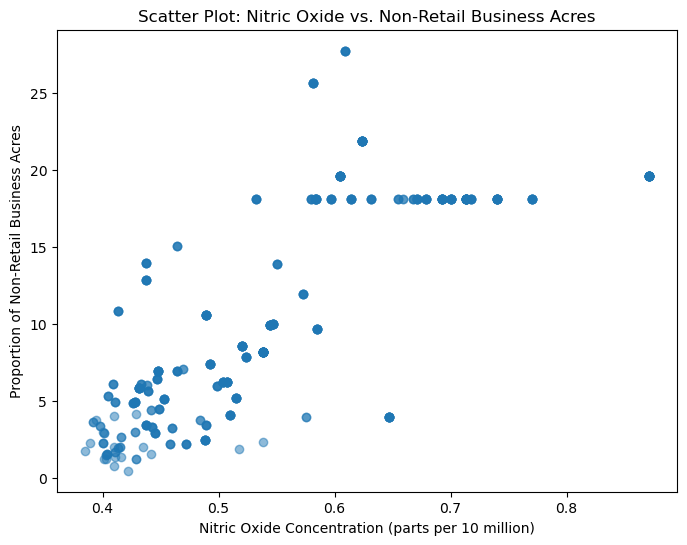

In [6]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Scatter Plot: Nitric Oxide vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


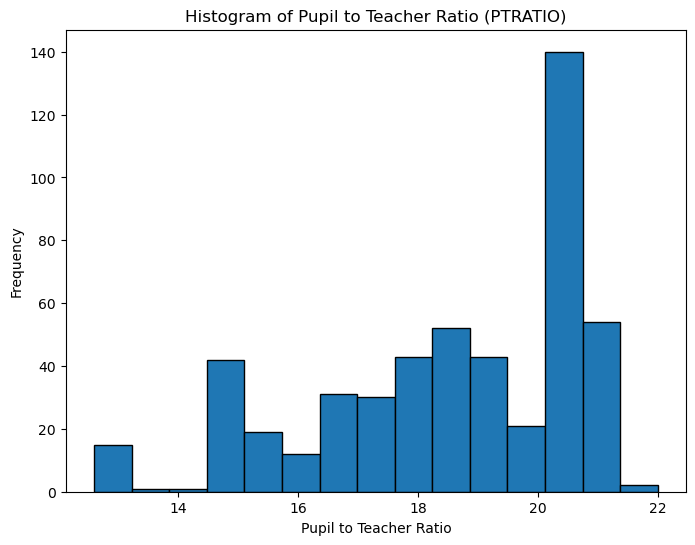

In [7]:
# Create a histogram for the pupil to teacher ratio variable

plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='k')
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


# Task 5: Use the appropriate tests to answer the questions provided.
For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for Independent Samples)

Hypothesis:
- Null Hypothesis (H0): There is no significant difference in the median house values between houses bounded by the Charles River (CHAS=1) and those not bounded (CHAS=0).
- Alternative Hypothesis (H1): There is a significant difference in the median house values between houses bounded by the Charles River and those not bounded.

In [8]:
# Split the data into two groups based on CHAS
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(bounded_by_river, not_bounded_by_river)

alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis")
else:
    print("Conclusion: Fail to reject the null hypothesis")


Conclusion: Reject the null hypothesis


### Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

- Null Hypothesis (H0): There is no significant difference in the median house values (MEDV) among different age groups (discretized AGE variable).
- Alternative Hypothesis (H1): There is a significant difference in the median house values among different age groups.

In [9]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_Group'] == '<=35 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '36-70 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '>=71 years']['MEDV']
)

alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis")
else:
    print("Conclusion: Fail to reject the null hypothesis")

Conclusion: Reject the null hypothesis


### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

- Null Hypothesis (H0): There is no significant relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
- Alternative Hypothesis (H1): There is a significant relationship between NOX and INDUS.

In [10]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis")
else:
    print("Conclusion: Fail to reject the null hypothesis")

Conclusion: Reject the null hypothesis


### What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression Analysis)

In [11]:
import statsmodels.api as sm

# Define the dependent variable (Y) and independent variable (X)
X = boston_df['DIS']  # Weighted distance to employment centers
Y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(Y, X).fit()

# Get the regression coefficients and summary statistics
coefficients = model.params
summary = model.summary()

print(summary)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        22:11:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

For every one-unit increase in the weighted distance to employment centers (DIS), the estimated median house value (MEDV) is expected to increase by approximately 1,091.6 (in $ 1000s).
In practical terms, this suggests that, on average, as you move further away from the Boston employment centers (increasing DIS), you can expect an increase in the median house value. This positive coefficient indicates that there is a positive linear relationship between the weighted distance to employment centers and the median house values. However, it's important to note that the coefficient value is relatively small, suggesting that the impact of DIS on MEDV is relatively modest.

Keep in mind that while this analysis shows a statistically significant relationship, the R-squared value (0.062) indicates that the model explains only a small portion of the variability in median house values. Other factors not included in the model may also influence house values, and additional analysis or consideration of other predictors may be necessary to provide a more comprehensive explanation of the impact on house values.